# Extract crassphage annotations

In [24]:
import pandas as pd

DRAM_results_folder="/home/davidmartins/Documentos/Viral_analysis/DRAMv"
crass_list_folder="/home/davidmartins/Documentos/Viral_analysis/genomad"

def renameScaffold(string):
    string = string.split('-')[0]
    return string
    
df = pd.read_csv(f'{DRAM_results_folder}/IT1_vs2/annotations.tsv',sep='\t')
df['scaffold'] = df['scaffold'].apply(renameScaffold)
to_maintain= pd.read_csv(f'{crass_list_folder}/IT1_crass_contigs.txt',names=['contig'])
df = df[df['scaffold'].isin(to_maintain['contig'])]
df = df[['scaffold','kegg_hit','viral_hit','pfam_hits','vogdb_hits']]
df= df.set_index('scaffold')
# Drop rows where all elements are NaN
df1 = df.dropna(how='all')

df = pd.read_csv(f'{DRAM_results_folder}/IT2_vs2/annotations.tsv',sep='\t')
df['scaffold'] = df['scaffold'].apply(renameScaffold)
to_maintain= pd.read_csv(f'{crass_list_folder}/IT2_crass_contigs.txt',names=['contig'])
df = df[df['scaffold'].isin(to_maintain['contig'])]
df = df[['scaffold','kegg_hit','viral_hit','pfam_hits','vogdb_hits']]
df= df.set_index('scaffold')
# Drop rows where all elements are NaN
df2 = df.dropna(how='all')


df = pd.read_csv(f'{DRAM_results_folder}/IT3_vs2/annotations.tsv',sep='\t')
df['scaffold'] = df['scaffold'].apply(renameScaffold)
to_maintain= pd.read_csv(f'{crass_list_folder}/IT3_crass_contigs.txt',names=['contig'])
df = df[df['scaffold'].isin(to_maintain['contig'])]
df = df[['scaffold','kegg_hit','viral_hit','pfam_hits','vogdb_hits']]
df= df.set_index('scaffold')
# Drop rows where all elements are NaN
df3 = df.dropna(how='all')


df = pd.read_csv(f'{DRAM_results_folder}/IT4_vs2/annotations.tsv',sep='\t')
df['scaffold'] = df['scaffold'].apply(renameScaffold)
to_maintain= pd.read_csv(f'{crass_list_folder}/IT4_crass_contigs.txt',names=['contig'])
df = df[df['scaffold'].isin(to_maintain['contig'])]
df = df[['scaffold','kegg_hit','viral_hit','pfam_hits','vogdb_hits']]
df= df.set_index('scaffold')
# Drop rows where all elements are NaN
df4 = df.dropna(how='all')

final = pd.concat([df1,df2,df3,df4])
final


,kegg_hit,viral_hit,pfam_hits,vogdb_hits
scaffold,,,,
k87_1148724,NaN,YP_010356533.1 virion structural protein [Cell...,NaN,NaN
k87_1148724,NaN,YP_010356164.1 virion structural protein [Flav...,NaN,REFSEQ virion structural protein; Xu
k87_1148724,NaN,YP_010356522.1 virion structural protein [Flav...,NaN,REFSEQ virion structural protein; Xu
k87_2005496,NaN,YP_010845116.1 recombinase [Vibrio phage vB_Vp...,NaN,NaN
k87_2005496,NaN,YP_009855310.1 hypothetical protein HWC97_gp27...,NaN,REFSEQ hypothetical protein; Xu
...,...,...,...,...
k87_7757458,NaN,YP_010112422.1 nuclear pore complex protein-li...,NaN,NaN
k87_7757458,NaN,YP_010111146.1 hypothetical protein KNV36_gp05...,NaN,REFSEQ hypothetical protein; Xu
k87_7757458,NaN,NaN,NaN,sp|Q5UNS9|COLL7_MIMIV Collagen-like protein 7;...


# Extract crassphage annotations by VOGDB classification

In [25]:
import pandas as pd
def renameScaffold(string):
    string = string.split('-')[0]
    return string

# Define a function to process each sample
def process_sample(sample):
    # Read the data for the sample
    df = pd.read_csv(f'{DRAM_results_folder}/{sample}_vs2/dramv-distill/vMAG_stats.tsv', sep='\t')
    df.rename(columns={'Unnamed: 0': 'contig_id'}, inplace=True)
    df = df[['contig_id', 'Viral replication genes', 'Viral hypothetical genes', 'Viral genes with unknown function',
             'Viral genes with host benefits', 'Viral genes with viral benefits', 'Viral structure genes']]
    df['contig_id'] = df['contig_id'].apply(renameScaffold)
    
    # Filter to maintain only relevant contigs
    to_maintain = pd.read_csv(f'{crass_list_folder}/{sample}_crass_contigs.txt', names=['contig'])
    df = df[df['contig_id'].isin(to_maintain['contig'])]
    
    # Summarize data for the sample
    df_summary = pd.DataFrame({
        'Sample': [sample],
        'Viral replication genes': [df['Viral replication genes'].sum()],
        'Viral hypothetical genes': [df['Viral hypothetical genes'].sum()],
        'Viral genes with unknown function': [df['Viral genes with unknown function'].sum()],
        'Viral genes with host benefits': [df['Viral genes with host benefits'].sum()],
        'Viral genes with viral benefits': [df['Viral genes with viral benefits'].sum()],
        'Viral structure genes': [df['Viral structure genes'].sum()]
    })
    
    return df_summary

# List of samples
samples = ['IT1', 'IT2', 'IT3', 'IT4']

# Process each sample and store results in a list
summary_dataframes = []
for sample in samples:
    summary_dataframes.append(process_sample(sample))

# Concatenate all summaries into a single DataFrame
final_summary = pd.concat(summary_dataframes, ignore_index=True)
final_summary = final_summary.T
final_summary

final_summary

,0,1,2,3
Sample,IT1,IT2,IT3,IT4
Viral replication genes,0.0,2.0,5.0,4.0
Viral hypothetical genes,136.0,129.0,164.0,283.0
Viral genes with unknown function,74.0,64.0,70.0,114.0
Viral genes with host benefits,6.0,4.0,4.0,6.0
Viral genes with viral benefits,0.0,1.0,1.0,1.0
Viral structure genes,2.0,1.0,0.0,3.0


# Plot the venn diagram with crassphage annotations by sample location

The crass_all_genes.tsv table was manually constructed from the final dataframe

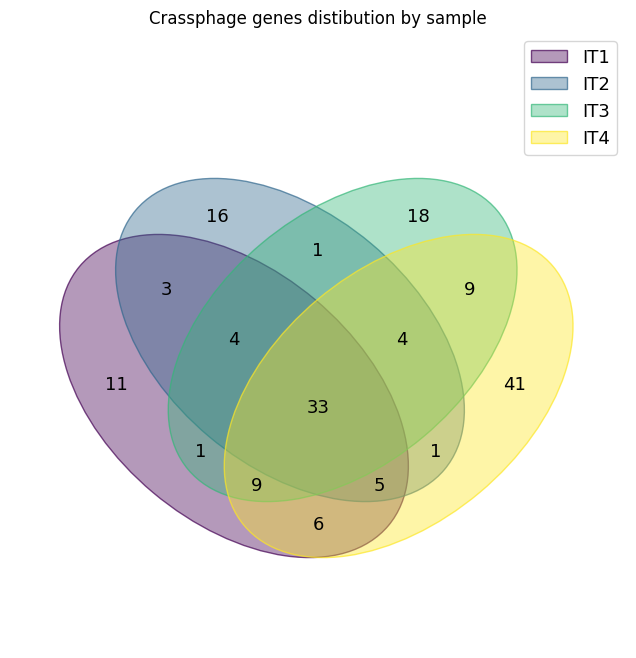

In [26]:
import pandas as pd
from venn import venn
import matplotlib.pyplot as plt

df = pd.read_csv('crass_all_genes.tsv',sep='\t')

# Group by 'sample' and convert 'viral_hit' to sets
grouped = df.groupby('sample')['viral_hit'].apply(set)

# Convert to dictionary format for easy access
sample_sets = grouped.to_dict()

# Plot the Venn diagram for four sets
venn(sample_sets)
plt.title('Crassphage genes distibution by sample')
# Display the diagram
plt.show()

# Extract Crassphage Host Taxonomies

In [27]:
import pandas as pd

IPHOP_folder='/home/davidmartins/Documentos/Viral_analysis/iphop'


# Function to process each dataset
def process_dataset(it_number):
    df = pd.read_csv(f'{IPHOP_folder}/IT{it_number}/Host_prediction_to_genome_m90.csv')
    df = df[['Virus', 'Host taxonomy']]
    
    crass = pd.read_csv(f'{crass_list_folder}/IT{it_number}_crass_contigs.txt', names=['contig'])
    df = df[df['Virus'].isin(crass['contig'])]
    df['sample'] = f'IT{it_number}'
    
    return df

# List to store results
results = []

# Loop through the datasets
for i in range(1, 5):
    df_processed = process_dataset(i)
    results.append(df_processed)

all_results = pd.concat(results, ignore_index=True)

all_results

,Virus,Host taxonomy,sample
0,k87_6116591,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,IT2
1,k87_6116591,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,IT2
2,k87_669610,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,IT2
3,k87_7580266,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,IT2
4,k87_7580266,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,IT2
5,k87_7580266,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,IT2
6,k87_7580266,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,IT2
7,k87_7580266,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,IT2
8,k87_7580266,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,IT2
9,k87_7580266,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,IT2


# Extract the annotations of crassphages positively correlated to population density

In [28]:
import pandas as pd
import sys
import glob

DRAM_results_folder="/home/davidmartins/Documentos/Viral_analysis/DRAMv"

def renameScaffold(string):
    string = string.split('-')[0]
    return string

    
df1 = pd.read_csv(f'{DRAM_results_folder}/IT1_vs2/annotations.tsv',sep='\t')
df1['scaffold'] = df1['scaffold'].apply(renameScaffold)
df1['scaffold'] = df1['scaffold'].str.replace('k87','IT1')
df1_to_extract = pd.read_csv('it1_crass_pos_pop_coor.tsv',sep='\t')
df1 = df1[df1['scaffold'].isin(df1_to_extract['contig_id'])]

df2 = pd.read_csv(f'{DRAM_results_folder}/IT2_vs2/annotations.tsv', sep='\t')
df2['scaffold'] = df2['scaffold'].apply(renameScaffold)
df2['scaffold'] = df2['scaffold'].str.replace('k87', 'IT2')
df2_to_extract = pd.read_csv('it2_crass_pos_pop_coor.tsv', sep='\t')
df2 = df2[df2['scaffold'].isin(df2_to_extract['contig_id'])]

df3 = pd.read_csv(f'{DRAM_results_folder}/IT3_vs2/annotations.tsv', sep='\t')
df3['scaffold'] = df3['scaffold'].apply(renameScaffold)
df3['scaffold'] = df3['scaffold'].str.replace('k87', 'IT3')
df3_to_extract = pd.read_csv('it3_crass_pos_pop_coor.tsv', sep='\t')
df3 = df3[df3['scaffold'].isin(df3_to_extract['contig_id'])]

df4 = pd.read_csv(f'{DRAM_results_folder}/IT4_vs2/annotations.tsv', sep='\t')
df4['scaffold'] = df4['scaffold'].apply(renameScaffold)
df4['scaffold'] = df4['scaffold'].str.replace('k87', 'IT4')
df4_to_extract = pd.read_csv('it4_crass_pos_pop_coor.tsv', sep='\t')
df4 = df4[df4['scaffold'].isin(df4_to_extract['contig_id'])]

final = pd.concat([df1,df2,df3,df4])
final = final[['scaffold','viral_hit','kegg_hit','pfam_hits','vogdb_hits']]
#final.to_csv('crass_coor_annot.txt',sep='\t',index=False)

- crass_coor_annot_final.txt -> This file was manually made using the final Dataframe data 
- shared_corr_crass.txt -> The shared genes between the crassphages correlated with human density and the genes shared between all samples

In [29]:
df = pd.read_csv('crass_all_genes.tsv',sep='\t')
shared = df.groupby('viral_hit')['sample'].apply(set).reset_index()
shared = shared[shared['sample'].apply(len) == len(df['sample'].unique())]
shared = shared[['viral_hit']]


crass = pd.read_csv('crass_coor_annot_final.txt',sep='\t')
shared_corr_crass = crass[crass['annotation'].isin(shared['viral_hit'])]
shared_corr_crass.to_csv('shared_corr_crass.txt',sep='\t',index=False)
shared_corr_crass

,annotation
1,YP_010356164.1 virion structural protein [Flav...
2,YP_010356522.1 virion structural protein [Flav...
14,YP_010845116.1 recombinase [Vibrio phage vB_Vp...
25,YP_010356518.1 portal protein [Flavobacterium ...
35,YP_010111819.1 Sak4-like ssDNA annealing prote...
36,YP_010110469.1 hypothetical protein KNV29_gp07...
52,YP_010356520.1 virion structural protein [Flav...
55,YP_010108895.1 co-chaperonin GroES [Flavobacte...
58,YP_010356162.1 hypothetical protein M1M19_gp27...
59,YP_010356161.1 virion structural protein [Flav...
